# **Regressão Linear Simples**

A Regressão Linear Simples modela a magnitude de uma variável e aquela de uma segunda. Mas, e a correlação? A correlação é outra forma de medir como duas variáveis se relacionam. A diferença é que enquanto a correlação mede a força de uma associação entre duas variáveis, a regressão quantifica a natureza do relacionamento.

### A Equação de Regressão

A Regressão Linear Simples estima xatamente o quanto Y mudará quando X mudar em uma certa quantidade. Com a regressão estamos tentando prever a variável Y a partir de X usando um relacionamento linear.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/731c6bb6ae3b5f933db68a82e7377e63910a887c"></img>

O símbolo α é conhecido como o *intercepto* (ou constante), e o símbolo β, como o *declive* para X. A variável Y é conhecida como resposta ou variável dependente, já que depende de X. A variável X é conhecida como preditora ou variável independente. A seguir está um exemplo da linha de regressão de um modelo.

<img src='https://upload.wikimedia.org/wikipedia/commons/9/9e/Reta_Regressora.jpg' height="300" width="400"></img>

In [1]:
# importando bibliotecas
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

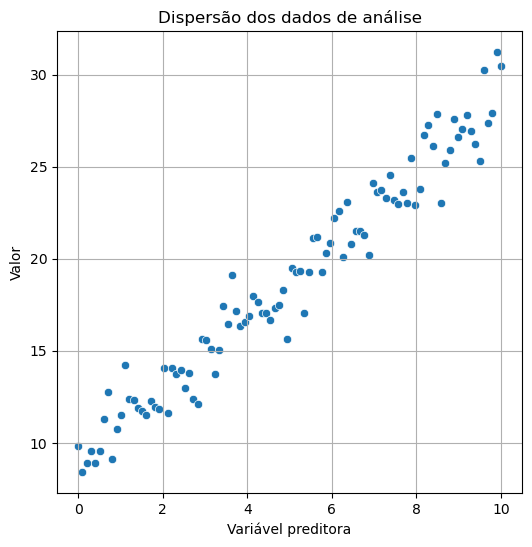

In [2]:
# produzindo dados aleatórios para regressão
m = np.random.randint(1,4)  # inclinação
b = np.random.randint(3,10)  # interceptação

# Gerar dados x
X = np.linspace(0, 10, 100)

ruido = np.random.normal(0, 1.5, size=len(X)) # Gerar dados y sem ruído
Y = (m * X + b) + ruido

plt.figure(figsize=(6,6))
sns.scatterplot(x=X, y=Y)
plt.title('Dispersão dos dados de análise')
plt.xlabel('Variável preditora')
plt.ylabel('Valor')
plt.grid()
plt.show()

### Valores Ajustados e Resíduos

Em geral, os dados não ficam exatamente em uma linha, então a equação de regressão deveria incluir um termo de erro:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4681e28c4c164084adb063912d49bc12f6905d5c"></img>

Calculamos os residuos *ei* subtaindo os valores previstos dos dados originais.

<img src='https://wikiciencias.casadasciencias.org/wiki/images/9/91/Min_quad.png'></img>

### Mínimos Quadrados

Para entender como um modelo se ajusta aos dados, temos que, na prática fazemos a estimativa que minimiza a soma dos valores quadrados do resíduo, também chamados de *residual sum of squares (RSS)*:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/15525c58b414d014b7d44d802826ca39fa54c7e1'></img>

As estimativas α e β são os valores que minimizam RSS


In [14]:
def calcular_coeficientes(X, Y):

    y_bar = np.mean(Y)
    x_bar = np.mean(X)

    beta = []
    if X.ndim == 1:
        beta.append(np.dot(Y-y_bar, X[:] - x_bar) / sum((X[:]-x_bar)**2))
    else:
        for x in range(X.ndim):
            beta.append(np.dot(Y-y_bar, X[:,x] - x_bar) / sum((X[:,x]-x_bar)**2))
    
    alpha = y_bar - (beta*x_bar)

    return alpha, beta

def regressao_linear(alpha, beta, X):

    Y_reg = alpha + beta * X
    return Y_reg

def calcular_RSS(Y, Y_pred) -> float:

    RSS = sum((Y - Y_pred)**2)
    return RSS

In [15]:
a, b = calcular_coeficientes(X, Y)
y_pred = regressao_linear(a, b, X)
RSS = calcular_RSS(Y, y_pred)

print(f'Intercepto: {a:.2f}')
print(f'Coeficiente: {b:.2f}')
print(f'Residual Sum of Squares (RSS): {RSS:.2f}')

plt.figure(figsize=(6,6))
sns.scatterplot(x=X, y=Y, label='Valores reais')
plt.plot(X, y_pred, label='Reta de Regressão', color='red')
plt.title('Dispersão dos dados de análise')
plt.xlabel('Variável preditora')
plt.ylabel('Valor')
plt.xlim(0-1,max(X)+1)
plt.legend()
plt.grid()
plt.show()

AttributeError: 'list' object has no attribute 'values'

TypeError: index expected at least 1 argument, got 0

Um modelo d regressão acomoda bem s dados de modo que as mudanças de X levem a mudanças em Y. No entanto, a equação de regressão não prova a direção da causa. É o nosso conhecimento sobre o processo e o business, que leva à conclusão de quem impacta quem.

# **Regressão Linear Múltipla**

Quando existem múltiplas varipaveis preditoras, a equação simplesmente s estende para acomodá-las.

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/b7ade53ead459e6683f434982ee6811e028eda7f'></img>

Em vez de uma linha reta, agora temos um modelo linear e o relacionamento entre cada coeficiente e sua variável é linear. Todos os outros conceitos em egressão linear simples se estendem para a configuação da regressão linear múltipla.